In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf1

%matplotlib inline

In [6]:
tf1.disable_eager_execution()

In [3]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)

xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

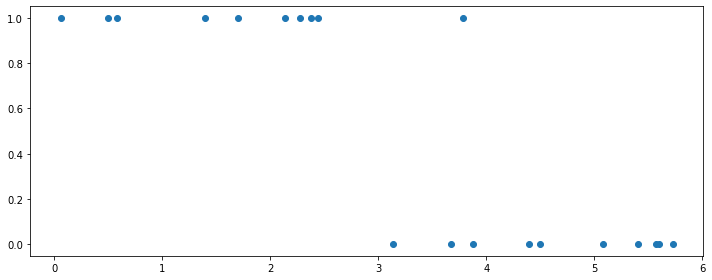

In [4]:
plt.figure(figsize = (10, 4))
plt.scatter(xs, labels)
plt.tight_layout()
plt.show()

In [7]:
learning_rate = 0.001
training_epochs = 1000

X = tf1.placeholder('float')
Y = tf1.placeholder('float')

In [8]:
w = tf.Variable([0., 0.], name = 'parameters')

In [9]:
def model(x, w):
    return tf1.add(tf1.multiply(w[1], tf1.pow(x, 1)),
                  tf1.multiply(w[0], tf1.pow(x, 0)))

In [10]:
y_model = model(X, w)

In [11]:
cost = tf1.reduce_sum(tf1.square(Y - y_model))

In [12]:
train_op = tf1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [15]:
correct_prediction = tf1.equal(Y, tf1.to_float(tf1.greater(y_model, 0.5)))
accuracy = tf1.reduce_mean(tf1.to_float(correct_prediction))

In [16]:
sess = tf1.Session()
init = tf1.global_variables_initializer()
sess.run(init)

In [17]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict = {X:xs, Y:labels})
    current_cost = sess.run(cost, feed_dict = {X:xs, Y:labels})
    if epoch %100 == 0:
        print(epoch, current_cost)

0 8.827092
100 2.69626
200 1.7022903
300 1.5346376
400 1.5063598
500 1.5015904
600 1.5007856
700 1.50065
800 1.500627
900 1.5006232


In [18]:
w_val = sess.run(w)
print("Learned parameters: ", w_val)

Learned parameters:  [ 1.2560061  -0.23550707]


In [19]:
print('Accuracy', sess.run(accuracy, feed_dict = {X:xs, Y:labels}))
sess.close()

Accuracy 0.9


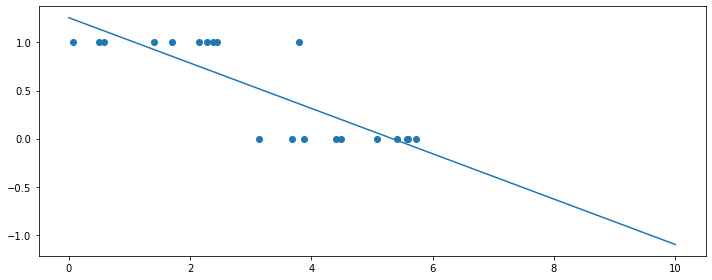

In [21]:
all_xs = np.linspace(0, 10, 100)
plt.figure(figsize = (10, 4))
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.tight_layout()
plt.show()